<a href="https://colab.research.google.com/github/Mona-1818/LGMVIP-DataScience/blob/main/handwritten_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np   
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation 
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten 
from termcolor import colored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#loading mnist dataset  
#trainig samples = 60,000 and test samples = 10,000
mnist_data = tf.keras.datasets.mnist 

In [ ]:
#train and test datasets
(x_train, y_train),(x_test, y_test) = mnist_data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#shape 
print("shape of training dataset : " + str(x_train.shape)) 
print("shape of test dataset : " + str(x_test.shape))

shape of training dataset : (60000, 28, 28)
shape of test dataset : (10000, 28, 28)


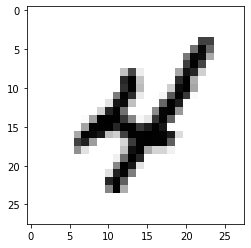

In [ ]:
#graph of binary image 
plt.imshow(x_train[9], cmap=plt.cm.binary) 

In [ ]:
#preprocessing 
x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)  

In [ ]:
#resize image 
image_size = 28 
x_trainr = np.array(x_train).reshape(-1, image_size, image_size, 1) 
x_testr = np.array(x_test).reshape(-1, image_size, image_size, 1)  

In [ ]:

#neural network
model = Sequential() 

# 1st covo layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#3rd layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#connected layer 
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation("relu")) 

model.add(Dense(32)) 
model.add(Activation('relu')) 

model.add(Dense(10)) 
model.add(Activation('softmax')) 



In [ ]:
#model.summary()

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1313/1313 [==============================] - 41s 31ms/step - loss: 0.3078 - accuracy: 0.9062 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 2/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.1001 - accuracy: 0.9704 - val_loss: 0.0833 - val_accuracy: 0.9745
Epoch 3/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0703 - accuracy: 0.9781 - val_loss: 0.0729 - val_accuracy: 0.9771
Epoch 4/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0531 - accuracy: 0.9829 - val_loss: 0.0601 - val_accuracy: 0.9816
Epoch 5/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0799 - val_accuracy: 0.9770


In [ ]:
#evaluation on testdata  
loss, accuracy = model.evaluate(x_testr, y_test)
print('loss on test sample : ' + str(loss)) 
print("validation accuracy on test sample :" +str(accuracy))

313/313 [==============================] - 2s 8ms/step - loss: 0.0732 - accuracy: 0.9795
loss on test sample : 0.07317137718200684
validation accuracy on test sample :0.9794999957084656


In [ ]:
#prediction 
prediction = model.predict([x_testr]) 
print(prediction)

[[5.5622372e-06 1.0873981e-06 2.9574194e-06 ... 9.9985695e-01
  2.1147296e-06 5.5265176e-05]
 [2.1257238e-05 4.6788671e-08 9.9996543e-01 ... 6.9511771e-08
  1.8340846e-07 3.7112398e-09]
 [1.6354170e-05 9.9990547e-01 1.1441357e-05 ... 1.4672400e-05
  2.2358263e-06 5.3498902e-06]
 ...
 [9.5712077e-11 2.3012067e-08 1.0158930e-09 ... 7.8371488e-07
  1.2641286e-08 3.1328946e-07]
 [2.5258209e-06 1.8428253e-09 1.1837787e-08 ... 5.9055663e-11
  4.1626972e-05 4.0821323e-07]
 [4.1973733e-04 2.9087220e-08 8.6536852e-07 ... 4.5006829e-09
  1.1000332e-07 7.8547181e-08]]


prediction :  7


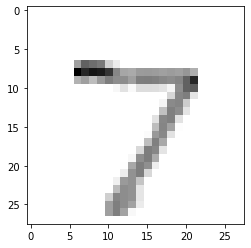

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary) 
print("prediction : ", np.argmax(prediction[0]))

prediction :  0


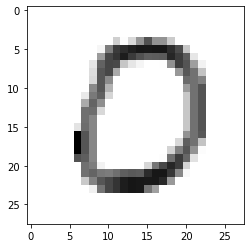

In [ ]:
plt.imshow(x_test[10], cmap=plt.cm.binary) 
print("prediction : ", np.argmax(prediction[10]))

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
image1 = cv.imread('/content/gdrive/MyDrive/three.png')  
resize = cv.resize(cv.cvtColor(image1, cv.COLOR_BGR2GRAY), (28,28), interpolation=cv.INTER_AREA) 
#normalize 
img = tf.keras.utils.normalize(resize, axis=1) 
img = np.array(img).reshape(-1, image_size, image_size, 1)  
print("prediction : ", np.argmax(model.predict(img)))

prediction :  3


In [ ]:
image2 = cv.imread('/content/gdrive/MyDrive/one.png')  
resize = cv.resize(cv.cvtColor(image2, cv.COLOR_BGR2GRAY), (28,28), interpolation=cv.INTER_AREA) 
#normalize 
img = tf.keras.utils.normalize(resize, axis=1) 
img = np.array(img).reshape(-1, image_size, image_size, 1)  
print("prediction : ", np.argmax(model.predict(img)))

prediction :  1


In [ ]:
image3 = cv.imread('/content/gdrive/MyDrive/eight.png')  
resize = cv.resize(cv.cvtColor(image3, cv.COLOR_BGR2GRAY), (28,28), interpolation=cv.INTER_AREA) 
#normalize 
img = tf.keras.utils.normalize(resize, axis=1) 
img = np.array(img).reshape(-1, image_size, image_size, 1)  
print("prediction : ", np.argmax(model.predict(img)))

prediction :  8


In [ ]:
print(colored("""
    THANKYOU 
    Created by Mona Verma """, "cyan", attrs =['bold'])) 


    THANKYOU 
    Created by Mona Verma 
